**AutoEncoders from scratch for Dimensionality Reduction**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.datasets import make_blobs # for data creation

**Data Creation**

In [0]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [143]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [0]:
X,y = data

In [145]:
X

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145],
       [ -9.81008003,  -5.35480445],
       [-11.18334003,  -6.7004804 ],
       [  0.51876688,   3.39210906],
       [ -8.09111654,  -6.92631627],
       [  1.1112886 ,   0.704398  ],
       [ -7.49469451,  -7.06186612],
       [ -0.75249891,   2.31574949],
       [  0.72046137,   1.63484242],
       [ -0.80867204,   1.41371822],
       [  1.13010192,  -0.25418504],
       [-10.6252148 ,  -6.71479817],
       [ -0.06311641,   3.15682868],
       [  0.56609951,   3.41000402],
       [ -9.10474956,  -7.83047821],
       [-11.33926304,  -7.83622233],
       [  0.29639341,   2.06317757],
       [ -0.52722349,   2.95534215],
 

In [146]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

**Adding noise to the data**

In [0]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [0]:
feature = pd.DataFrame(X)

In [149]:
feature

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [0]:
feature = pd.concat([feature,z_noise],axis=1)

In [0]:
feature.columns = ['X1','X2','X3']

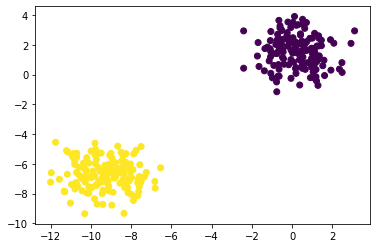

In [152]:
plt.scatter(feature['X1'],feature['X2'],c=y)

**Scaling and normalizing the data**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)

**Model Creation**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [0]:
from tensorflow.keras.optimizers import SGD

In [0]:
# 3->2->3 
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))
#encoder.add(Dense(2,activation='relu'))
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [0]:
autoencoder = Sequential([encoder,decoder])

In [0]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [159]:
autoencoder.fit(scaled_feature,scaled_feature,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 441us/sample - loss: 0.3350
Epoch 2/5
300/300 [==============================] - 0s 59us/sample - loss: 0.3350
Epoch 3/5
300/300 [==============================] - 0s 51us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 51us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 49us/sample - loss: 0.3350


In [0]:
encoded_2dim = encoder.predict(scaled_feature)

In [161]:
encoded_2dim.shape

(300, 2)

In [162]:
encoded_2dim

array([[0.00000000e+00, 6.54488266e-01],
       [1.25944152e-01, 1.79405701e+00],
       [8.52021277e-02, 1.74496734e+00],
       [0.00000000e+00, 4.65414107e-01],
       [0.00000000e+00, 3.93161356e-01],
       [0.00000000e+00, 4.75903779e-01],
       [1.80781245e-01, 1.51751268e+00],
       [0.00000000e+00, 4.36487645e-01],
       [4.24738854e-01, 1.65535283e+00],
       [7.81290680e-02, 1.70311415e+00],
       [0.00000000e+00, 6.07439399e-01],
       [0.00000000e+00, 3.72419745e-01],
       [1.84231013e-01, 1.78826404e+00],
       [0.00000000e+00, 4.89794970e-01],
       [1.97556376e-01, 1.53555965e+00],
       [0.00000000e+00, 5.99669755e-01],
       [1.42163783e-01, 1.64078867e+00],
       [0.00000000e+00, 1.75122917e+00],
       [0.00000000e+00, 1.69545722e+00],
       [0.00000000e+00, 1.54581177e+00],
       [0.00000000e+00, 4.45799708e-01],
       [1.44246928e-02, 1.82338655e+00],
       [3.87389332e-01, 1.68916011e+00],
       [0.00000000e+00, 3.46649945e-01],
       [0.000000

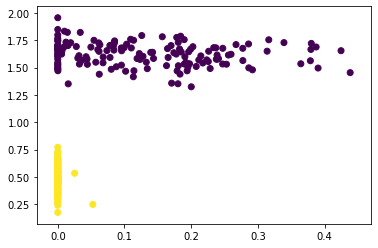

In [163]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)